In [224]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs

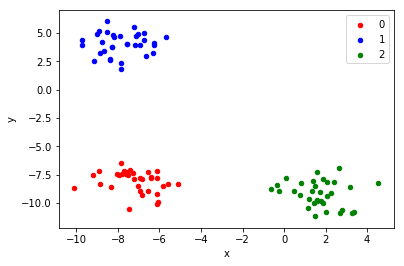

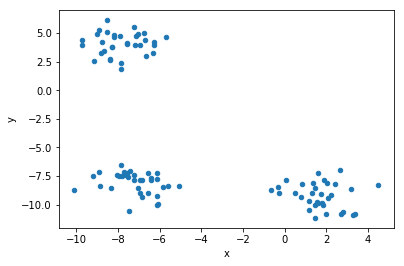

In [225]:
# generate 2d classification dataset
X, l = make_blobs(n_samples=100, centers=3, n_features=2)

# generate 2d classification dataset
# scatter plot, dots colored by class value

model = DataFrame(dict(x=X[:,0], y=X[:,1], label=l))

colors = {0:'red', 1:'blue', 2:'green'}

fig, ax = pyplot.subplots()

grouped = model.groupby('label')

for key, group in grouped:
    
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
pyplot.show()

model.plot.scatter(x='x', y='y');df.plot

In [226]:
train = model[0:len(model.index)//2]
test = model[len(model.index)//2:]

In [230]:
r = np.random.randint(0,len(test.index)-2)
print (r)
random_instance = test[r:r+1]
random_instance

40


,label,x,y
90,2,2.065637,-9.419705


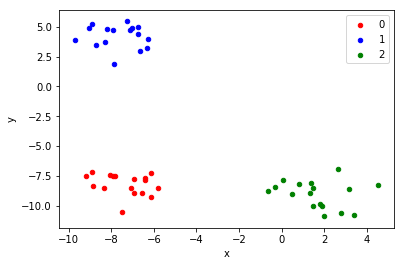

In [231]:
fig, ax = pyplot.subplots()
grouped = train.groupby('label')
for key, group in grouped:
    
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
pyplot.show()


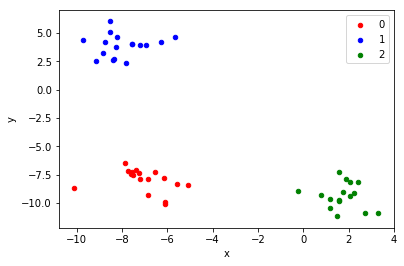

In [232]:
fig, ax = pyplot.subplots()
grouped = test.groupby('label')
for key, group in grouped:
    
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
pyplot.show()


In [233]:
def euclid_dist(A, B):
    Ax, Ay = A[0], A[1]
    Bx, By = B[0], B[1]
   
    dist = ((Ax-Bx)**2)+((Ay-By)**2)
   
    return dist

In [234]:
def fill_distances(model, instance):
    distances = []
    Ax, Ay = float(instance['x']), float(instance['y'])
    A = (Ax, Ay)
    for x in range(len(model.index)):
        B = (model['x'][x], model['y'][x])
        distances.append((euclid_dist(A, B), model['label'][x]))
            
    return distances     

In [308]:
from collections import defaultdict as dd
def predict(distances, k):
    votes = dd(int)
    
    for d in sorted(distances)[:k]:
     
        votes[str(d[1])] +=1
    
    
    prediction = sorted(votes, key=votes.get, reverse = True)[0]
    
    return prediction

In [309]:
votes = fill_distances(train, random_instance)

In [310]:
sorted(votes)

[(0.23120910066759048, 2),
 (0.38510435917790192, 2),
 (0.70404285184703053, 2),
 (0.76740335864204035, 2),
 (1.1077427926843206, 2),
 (1.8658596830428122, 2),
 (1.9877572931640519, 2),
 (2.0241188203208456, 2),
 (2.288282841178185, 2),
 (2.683089070524638, 2),
 (3.0108455886920744, 2),
 (3.6625770796808297, 2),
 (6.456581212491364, 2),
 (6.564726709714499, 2),
 (6.7627831485524998, 2),
 (7.331425155986274, 2),
 (7.7669050282524355, 2),
 (63.079881339231967, 0),
 (67.421380666212301, 0),
 (72.227913634523304, 0),
 (74.505164229720975, 0),
 (74.585587092955919, 0),
 (74.889383602504807, 0),
 (81.433163824125828, 0),
 (83.42973708639866, 0),
 (84.019890314217761, 0),
 (92.334918581183032, 0),
 (101.56173256847248, 0),
 (103.64267014085405, 0),
 (106.03375801932381, 0),
 (109.08697225220833, 0),
 (120.21194623267812, 0),
 (125.35968942510645, 0),
 (130.20527797933639, 0),
 (225.76539285217572, 1),
 (229.15172671232051, 1),
 (230.18469065919334, 1),
 (248.84511356587333, 1),
 (267.42140811

In [312]:
predict(votes,1)

'2'

In [319]:
def knn_predict(train, test, k):
    target = test['label']
    

In [154]:
random_instance

,label,x,y
4,2,-9.902341,1.690173


50    1
51    0
52    1
53    2
54    0
55    2
56    0
57    2
58    2
59    1
60    0
61    2
62    0
63    1
64    2
65    1
66    0
67    0
68    0
69    2
70    1
71    2
72    0
73    2
74    0
75    0
76    0
77    1
78    1
79    2
80    2
81    0
82    1
83    1
84    2
85    1
86    1
87    0
88    1
89    1
90    2
91    1
92    1
93    2
94    1
95    0
96    2
97    0
98    0
99    2
Name: label, dtype: int64

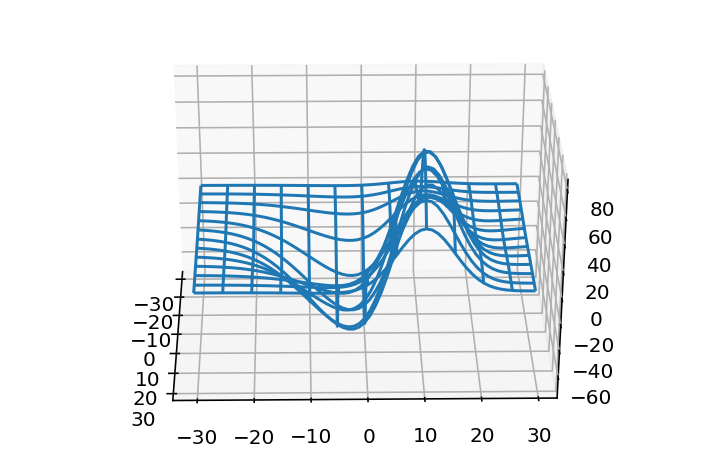

In [321]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)